In [1]:
from func_modules import ControllerGraph, root, faitabella, colorgraph, identifygroup
import networkx as nx
import pickle
import pandas as pd
import matplotlib.pyplot as plt

# Functionality 5: explaining and visualizing

For this functionality is required to find the communities that make the first graph, hero_graph.
In a network could be found nodes that can be easily grouped into (potentially overlapping) sets, such that each set of nodes is densely connected internally: this type of group is called *community*. There are several algorithms used to find network communities, we'll use the Girvan-Newman algorithm: this algorithm detects communities by progressively removing from the network edges with the higher edge betweenness centrality, i.e. the ones contained more shortest paths. 

In [2]:
edges = pd.read_csv('edges.csv')
controller = ControllerGraph(edges)
with open('graphs.pickle', 'rb') as file:
    hero_graph, hero_comics_graph = pickle.load(file)

In [38]:
numedges, graph1, checkhero, graph= controller.functionality(5, 
        hero_graph, num_heroes = 50, hero_1 = 'CAPTAIN AMERICA', hero_2 = 'IRON MAN/TONY STARK')

comps = list(nx.connected_components(graph1)) # lists of different connected component

In [39]:
print('This is the number of removed edges: ', numedges)

This is the number of removed edges:  1019


As we can see in the table the second community is composed only by one node: it's due to the extremely high density of the graph

In [40]:
faitabella(graph1,comps)       # communities' table 

Group 0                  Group 1
-----------------------  -------------------
HULK/DR. ROBERT BRUC     IRON MAN/TONY STARK
CANNONBALL II/SAM GU
NIGHTCRAWLER/KURT WA
SHE-HULK/JENNIFER WA
CAPTAIN BRITAIN/BRIA
DR. DOOM/VICTOR VON
JONES, RICHARD MILHO
COLOSSUS II/PETER RA
SPIDER-MAN/PETER PARKER
INVISIBLE WOMAN/SUE
PARKER, MAY
BLACK WIDOW/NATASHA
QUICKSILVER/PIETRO M
WASP/JANET VAN DYNE
DR. STRANGE/STEPHEN
VISION
HAWK
SUB-MARINER/NAMOR MA
THING/BENJAMIN J. GR
SILVER SURFER/NORRIN
NELSON, FRANKLIN FOG
MR. FANTASTIC/REED R
HERCULES [GREEK GOD]
BLACK PANTHER/T'CHAL
ICEMAN/ROBERT BOBBY
PUNISHER II/FRANK CA
STORM/ORORO MUNROE S
FURY, COL. NICHOLAS
WATSON-PARKER, MARY
WOLVERINE/LOGAN
ANGEL/WARREN KENNETH
ANT-MAN/DR. HENRY J.
JARVIS, EDWIN
SCARLET WITCH/WANDA
PROFESSOR X/CHARLES
BEAST/HENRY &HANK& P
HUMAN TORCH/JOHNNY S
DAREDEVIL/MATT MURDO
THOR/DR. DONALD BLAK
ROBERTSON, JOE
WONDER MAN/SIMON WIL
CAPTAIN AMERICA
CYCLOPS/SCOTT SUMMER
MARVEL GIRL/JEAN GRE
JAMESON, J. JONAH
SHADOWCAT/KATHERINE
RICHA

The nodes are very connected and the graph density is very high.

Original graph density:  0.9753401360544217

This is the original graph


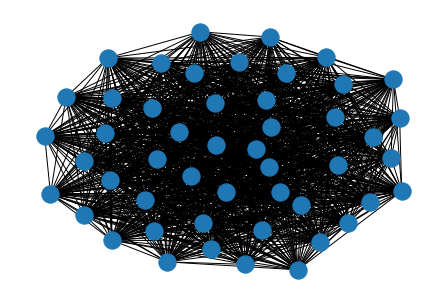

In [6]:
print('Original graph density: ', nx.density(graph))
print('\nThis is the original graph')
nx.draw(graph, with_labels=False)          # plot original graph
plt.show()

Two communities: one extremely dense and the other with only one node


These are the communities  2


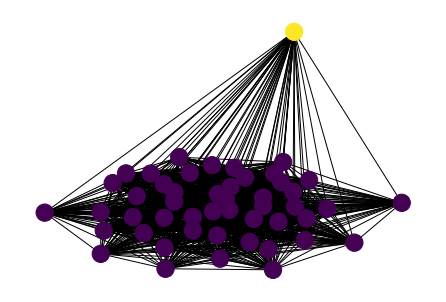

In [37]:
color_map, pos = colorgraph(graph1, comps)  # function which defines nodes' color and position by belonging community
print('\nThese are the communities ', len(comps))
nx.draw(graph, pos, node_color = list(color_map.values()), with_labels = False)
plt.show()

As we can see 'CAPTAIN AMERICA' and 'IRON MAN/TONY STARK' are in two different communities

Plot the final graph and identify the community/communities of 'CAPTAIN AMERICA' and 'IRON MAN/TONY STARK'


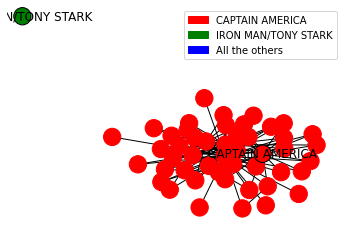

In [11]:
print("Plot the final graph and identify the community/communities of 'CAPTAIN AMERICA' and 'IRON MAN/TONY STARK'")
idhero = identifygroup(graph1,'CAPTAIN AMERICA','IRON MAN/TONY STARK',color_map)  # given heros' communitiesw 